## Data Transformation and Visualization

In [1]:
import os
os.chdir("../")

In [2]:
import pandas as pd

## Load data
df = pd.read_csv("artifacts/data_ingestion/data.csv")

# Obtain precipitation columns
precipitation_cols =[f"precipitation_{i}" for i in range(1, 25)]

df["precipitation"] = df[precipitation_cols].sum(axis=1)  # Sum the precipitation cols along the rows
df["rain"] = (df["precipitation"] > 0).astype(int) # If precipitation is greater than 0 it likely rained
df = df.drop(columns=precipitation_cols)
df = df.drop(columns=["precipitation"])
df.head()


date  temperature_2m_1  temperature_2m_2  temperature_2m_3  \
0  2025-07-25              26.0              25.4              24.7   
1  2025-07-26              25.8              25.4              25.1   
2  2025-07-27              26.3              25.8              25.5   
3  2025-07-28              27.9              27.3              26.9   
4  2025-07-29              27.7              27.1              26.7   

   temperature_2m_4  temperature_2m_5  temperature_2m_6  temperature_2m_7  \
0              24.3              24.1              23.8              23.7   
1              24.9              24.3              24.0              23.6   
2              25.4              25.1              25.0              24.7   
3              26.0              25.5              24.9              24.4   
4              26.2              25.8              25.5              25.2   

   temperature_2m_8  temperature_2m_9  ...  et0_fao_evapotranspiration_16  \
0              23.9              25.4  ...                           0.61   
1              23.4              25.3  ...                           0.62   
2              24.3              25.4  ...                           0.72   
3              24.2              26.2  ...                           0.73   
4              25.1              26.9  ...                           0.69   

   et0_fao_evapotranspiration_17  et0_fao_evapotranspiration_18  \
0                           0.59                           0.49   
1                           0.56                           0.48   
2                           0.66                           0.54   
3                           0.67                           0.57   
4                           0.47                           0.36   

   et0_fao_evapotranspiration_19  et0_fao_evapotranspiration_20  \
0                           0.25                           0.14   
1                           0.35                           0.20   
2                           0.38                           0.25   
3                           0.40                           0.25   
4                           0.31                           0.21   

   et0_fao_evapotranspiration_21  et0_fao_evapotranspiration_22  \
0                           0.05                           0.02   
1                           0.07                           0.05   
2                           0.09                           0.10   
3                           0.14                           0.03   
4                           0.07                           0.04   

   et0_fao_evapotranspiration_23  et0_fao_evapotranspiration_24  rain  
0                           0.00                           0.00     1  
1                           0.01                           0.01     1  
2                           0.07                           0.01     1  
3                           0.01                           0.03     0  
4                           0.00                           0.00     1  

[5 rows x 218 columns]

We now have a target column. Let's start EDA

## EDA

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('bmh')
df.info()

# Let's check for missing values
df.isnull().sum().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Columns: 218 entries, date to rain
dtypes: float64(216), int64(1), object(1)
memory usage: 1.2+ MB


0

No missing values is good news. Let's remove the date column since it does not provide much information.

In [4]:
df = df.drop(columns=["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Columns: 217 entries, temperature_2m_1 to rain
dtypes: float64(216), int64(1)
memory usage: 1.2 MB


###  Rain distribution

Let's take a look at the distribution of our target variable

count    731.000000
mean       0.547196
std        0.498108
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: rain, dtype: float64


<Axes: xlabel='rain', ylabel='Count'>

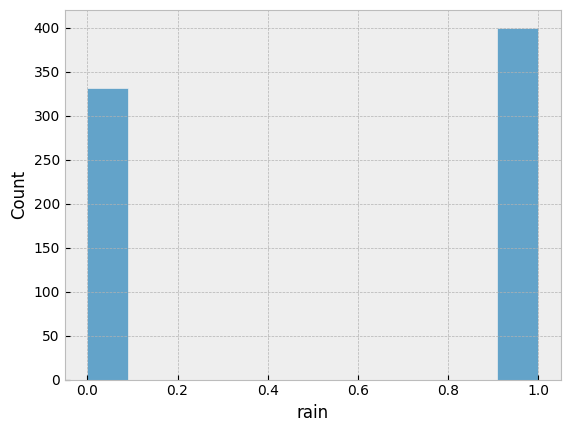

In [5]:

# Summary statistics
print(df["rain"].describe())

sns.histplot(df["rain"])

As we can see the dataset is mostly balanced. Let's now take a look at correlation heatmaps for hourly features pertaining to the same underlying feature.

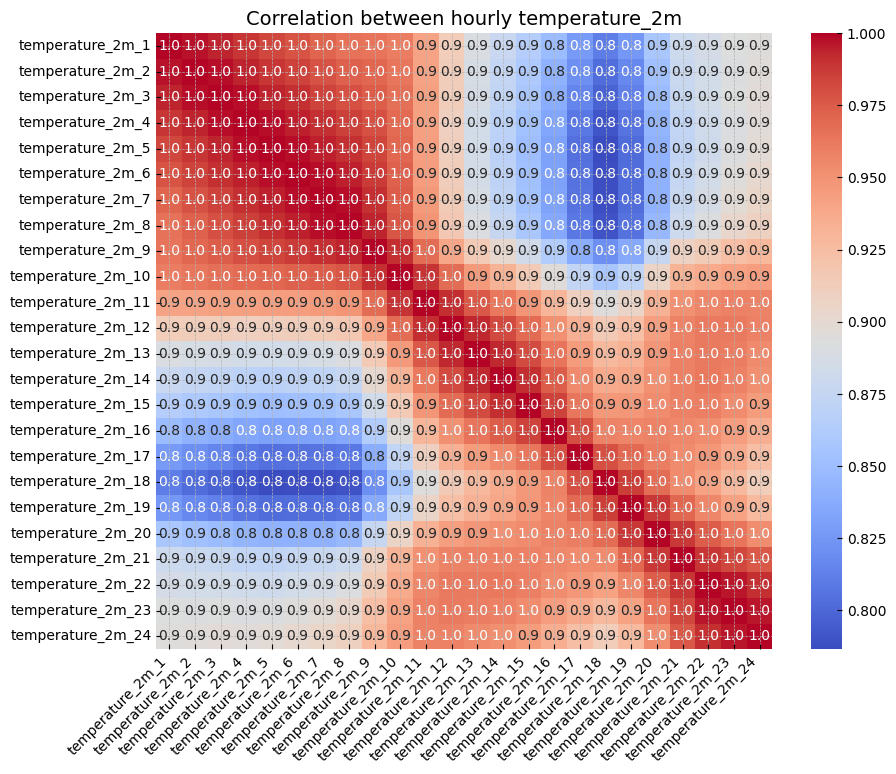

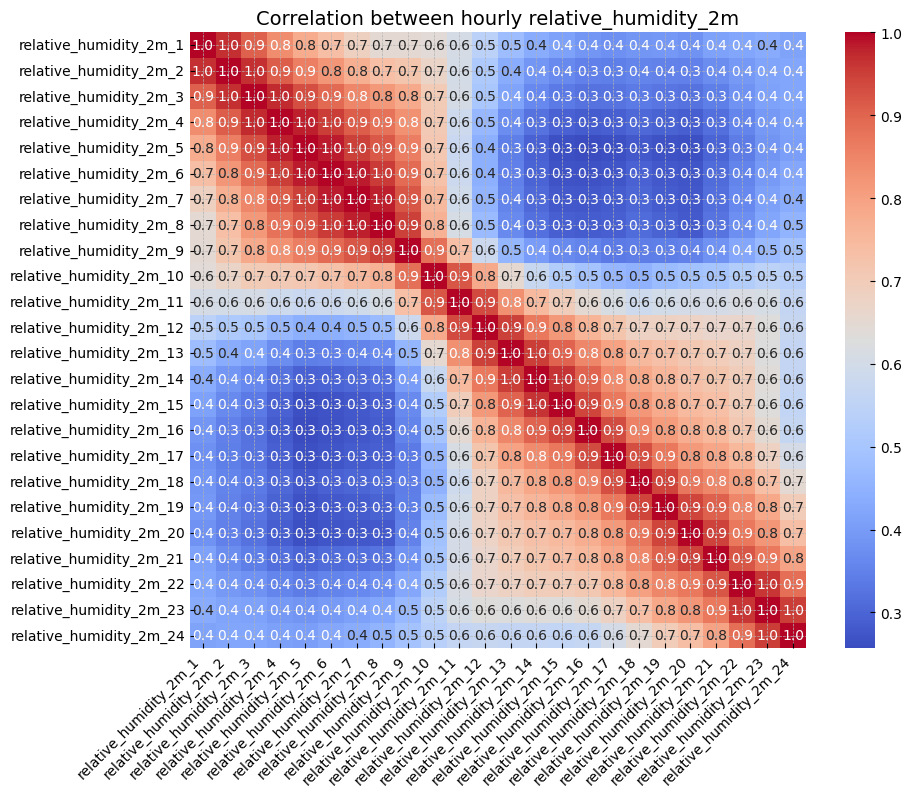

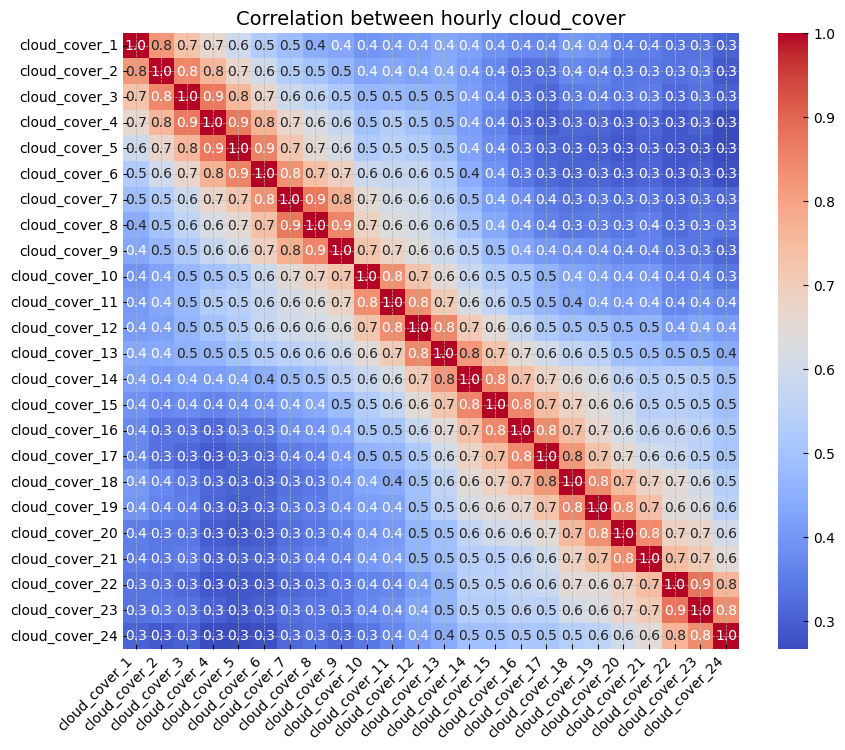

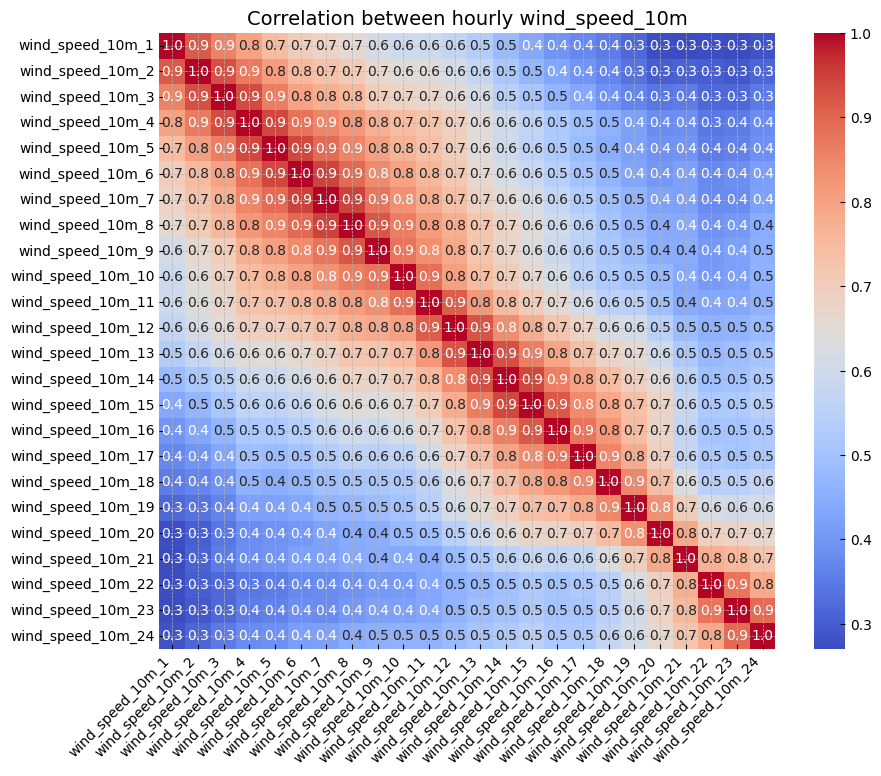

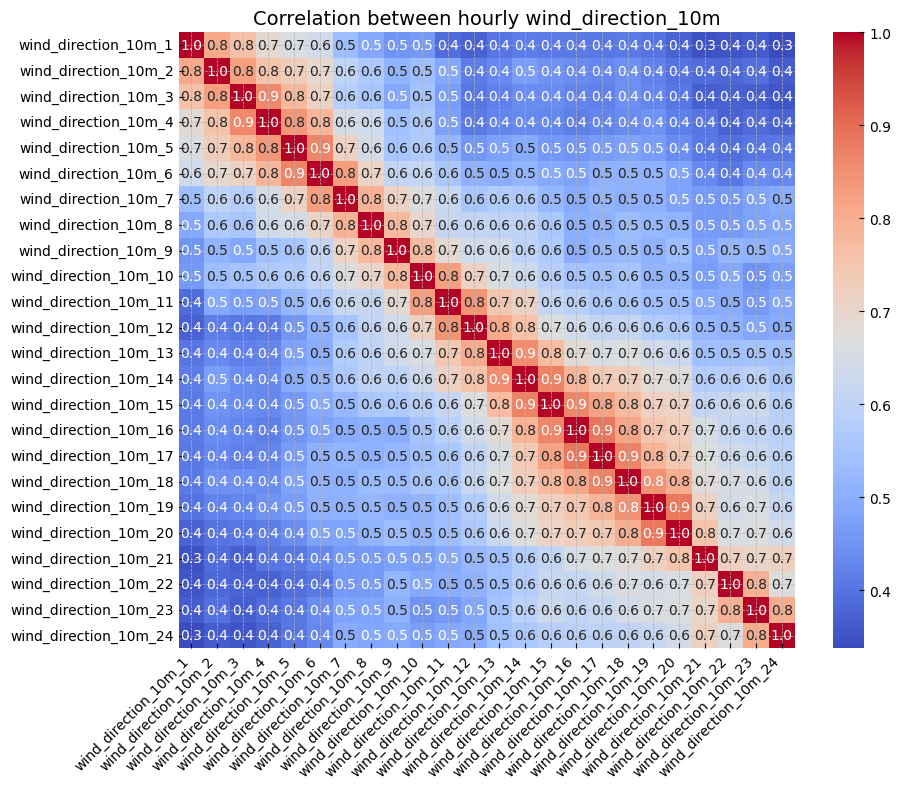

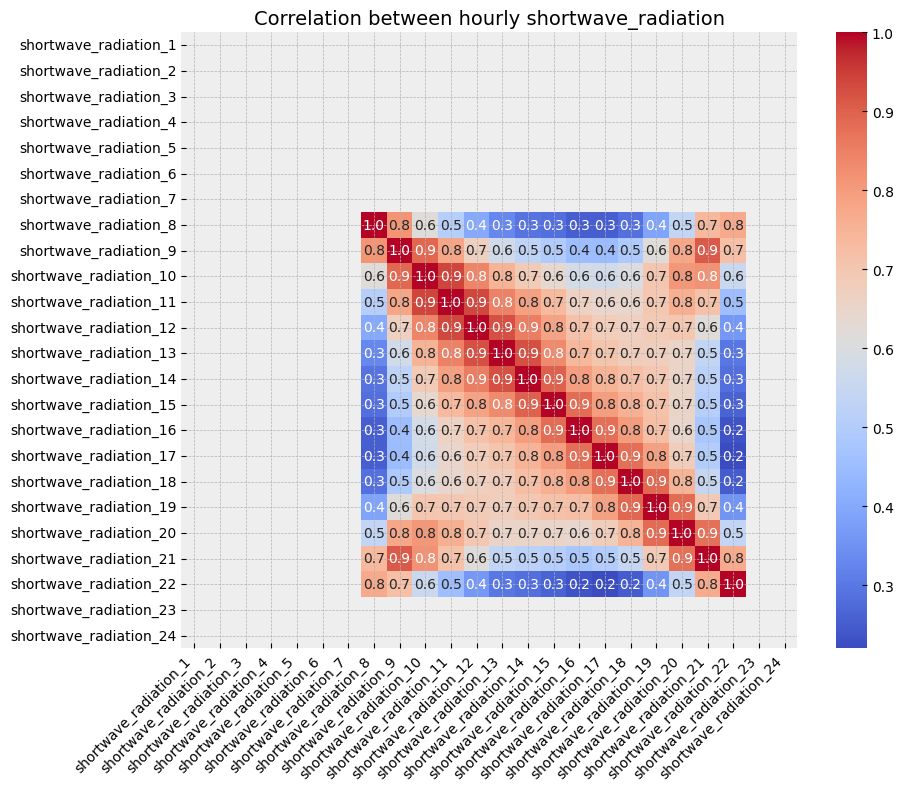

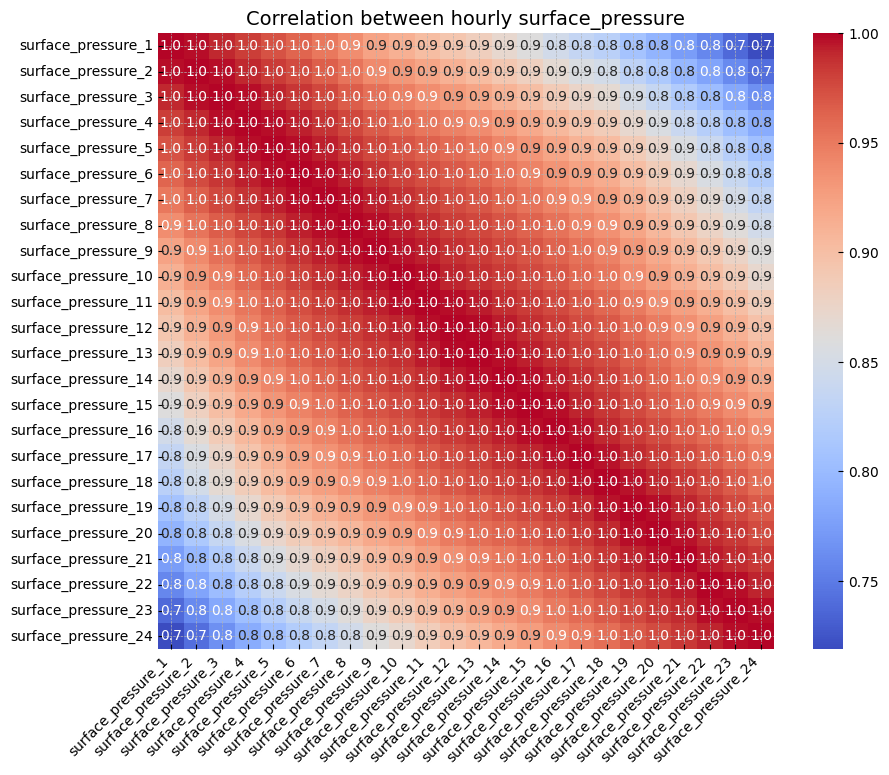

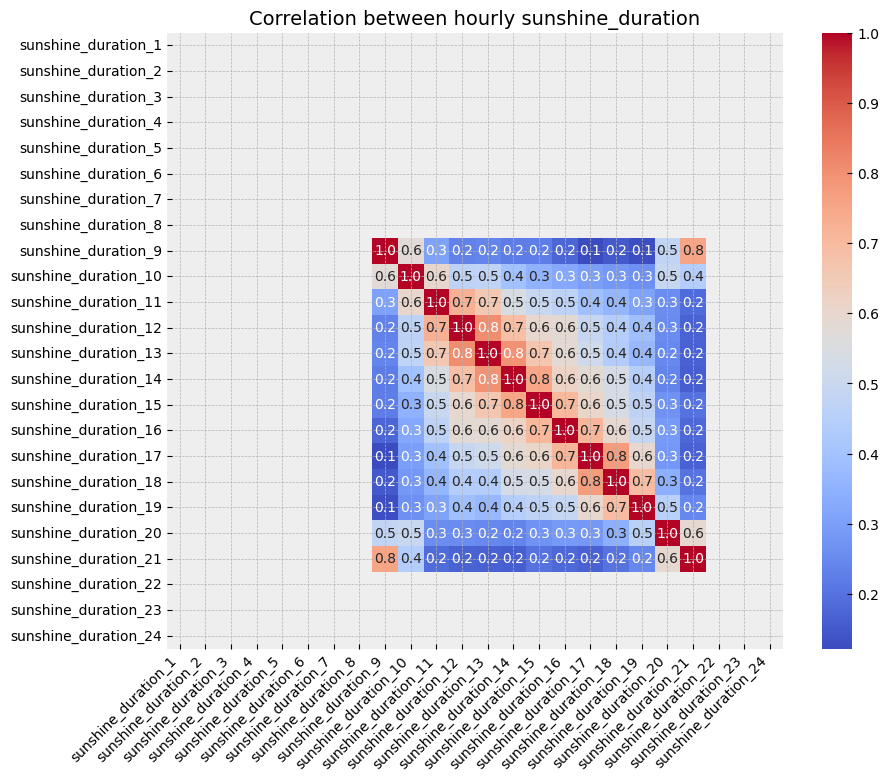

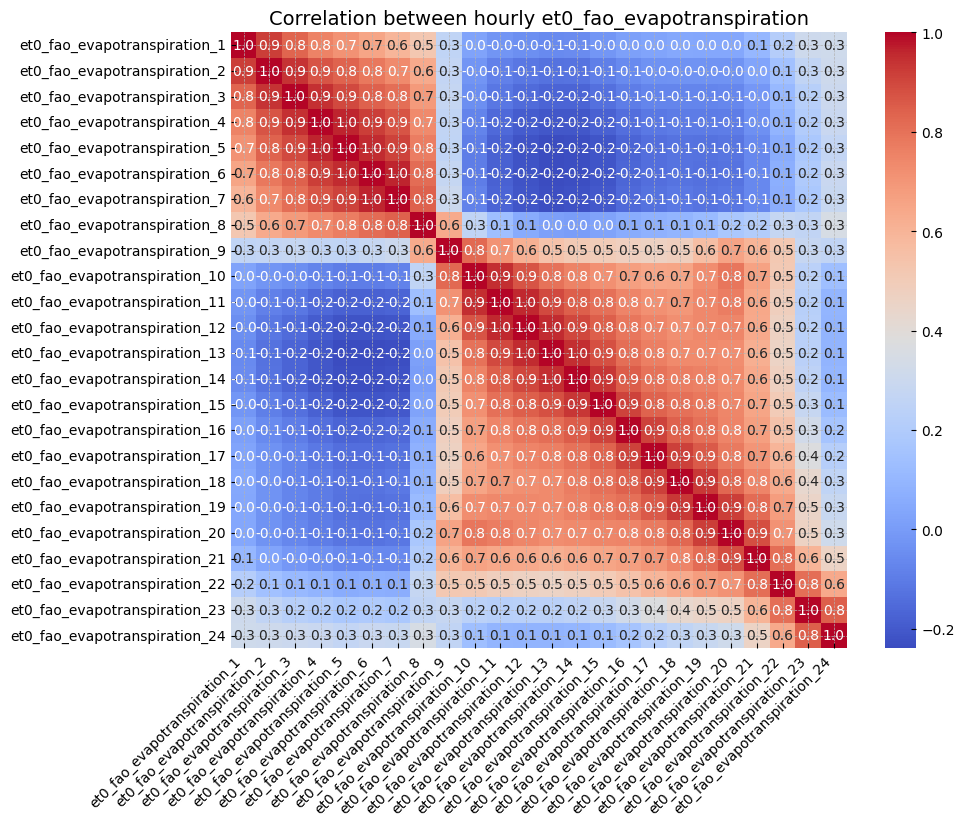

In [6]:

features = [
    "temperature_2m", "relative_humidity_2m", "cloud_cover",
    "wind_speed_10m", "wind_direction_10m", "shortwave_radiation",
    "surface_pressure", "sunshine_duration", "et0_fao_evapotranspiration"
]

for feature in features:
    cols = [col for col in df.columns if col.startswith(feature)]
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[cols].corr(), cmap="coolwarm", annot=True, fmt=".1f", square=True, cbar=True)
    plt.title(f"Correlation between hourly {feature}", fontsize=14)
    plt.xticks(rotation=45, ha='right')


Notice that the hourly surface pressures and hourly temperatures are highly correlated. What I will do is find averages for these since that will suffice due to the high correlation.

In [7]:
temp_cols = [col for col in df.columns if col.startswith("temperature_2m_")]
pressure_cols = [col for col in df.columns if col.startswith("surface_pressure_")]
df["surface_pressure_avg"] = df[pressure_cols].mean(axis=1)
df["temperature_2m_avg"] = df[temp_cols].mean(axis=1)
df = df.drop(columns=pressure_cols)
df = df.drop(columns=temp_cols)
df.head()

relative_humidity_2m_1  relative_humidity_2m_2  relative_humidity_2m_3  \
0                    88.0                    91.0                    93.0   
1                    89.0                    91.0                    92.0   
2                    85.0                    84.0                    88.0   
3                    71.0                    78.0                    80.0   
4                    74.0                    79.0                    83.0   

   relative_humidity_2m_4  relative_humidity_2m_5  relative_humidity_2m_6  \
0                    95.0                    96.0                    96.0   
1                    93.0                    96.0                    97.0   
2                    90.0                    93.0                    95.0   
3                    86.0                    89.0                    92.0   
4                    87.0                    91.0                    93.0   

   relative_humidity_2m_7  relative_humidity_2m_8  relative_humidity_2m_9  \
0                    97.0                    97.0                    92.0   
1                    99.0                    99.0                    94.0   
2                    97.0                    97.0                    93.0   
3                    94.0                    95.0                    82.0   
4                    94.0                    95.0                    90.0   

   relative_humidity_2m_10  ...  et0_fao_evapotranspiration_18  \
0                     85.0  ...                           0.49   
1                     81.0  ...                           0.48   
2                     80.0  ...                           0.54   
3                     71.0  ...                           0.57   
4                     81.0  ...                           0.36   

   et0_fao_evapotranspiration_19  et0_fao_evapotranspiration_20  \
0                           0.25                           0.14   
1                           0.35                           0.20   
2                           0.38                           0.25   
3                           0.40                           0.25   
4                           0.31                           0.21   

   et0_fao_evapotranspiration_21  et0_fao_evapotranspiration_22  \
0                           0.05                           0.02   
1                           0.07                           0.05   
2                           0.09                           0.10   
3                           0.14                           0.03   
4                           0.07                           0.04   

   et0_fao_evapotranspiration_23  et0_fao_evapotranspiration_24  rain  \
0                           0.00                           0.00     1   
1                           0.01                           0.01     1   
2                           0.07                           0.01     1   
3                           0.01                           0.03     0   
4                           0.00                           0.00     1   

   surface_pressure_avg  temperature_2m_avg  
0           1012.450000           27.879167  
1           1012.791667           28.633333  
2           1012.187500           30.516667  
3           1010.816667           30.820833  
4           1009.350000           29.466667  

[5 rows x 171 columns]

Now, I have a hunch that daily_sunshine will correlate with shortwave_radiation. So let's verify this.

In [8]:
hours = range(1, 25)
correlations = {}

for hour in hours:
    sun_col = f"sunshine_duration_{hour}"
    rad_col = f"shortwave_radiation_{hour}"

    corr = df[[sun_col, rad_col]].corr().iloc[0,1]
    print(f"For hour {hour} the correlation between {sun_col} and {rad_col} is: {corr}")

For hour 1 the correlation between sunshine_duration_1 and shortwave_radiation_1 is: nan
For hour 2 the correlation between sunshine_duration_2 and shortwave_radiation_2 is: nan
For hour 3 the correlation between sunshine_duration_3 and shortwave_radiation_3 is: nan
For hour 4 the correlation between sunshine_duration_4 and shortwave_radiation_4 is: nan
For hour 5 the correlation between sunshine_duration_5 and shortwave_radiation_5 is: nan
For hour 6 the correlation between sunshine_duration_6 and shortwave_radiation_6 is: nan
For hour 7 the correlation between sunshine_duration_7 and shortwave_radiation_7 is: nan
For hour 8 the correlation between sunshine_duration_8 and shortwave_radiation_8 is: nan
For hour 9 the correlation between sunshine_duration_9 and shortwave_radiation_9 is: 0.9617808895566309
For hour 10 the correlation between sunshine_duration_10 and shortwave_radiation_10 is: 0.8504482538855447
For hour 11 the correlation between sunshine_duration_11 and shortwave_radiat

Two things can be seen from the output above: first, there are some nan correlation values; this happens because during nightime the columns of these two features are constant. Finally, we see that there is a strong correlation between the two features, so we can keep only one of them. I will keep sunshine_duration.

In [9]:
cols = [col for col in df.columns if col.startswith("shortwave_radiation_")]
print(cols)
df = df.drop(columns=cols)
df.head()

['shortwave_radiation_1', 'shortwave_radiation_2', 'shortwave_radiation_3', 'shortwave_radiation_4', 'shortwave_radiation_5', 'shortwave_radiation_6', 'shortwave_radiation_7', 'shortwave_radiation_8', 'shortwave_radiation_9', 'shortwave_radiation_10', 'shortwave_radiation_11', 'shortwave_radiation_12', 'shortwave_radiation_13', 'shortwave_radiation_14', 'shortwave_radiation_15', 'shortwave_radiation_16', 'shortwave_radiation_17', 'shortwave_radiation_18', 'shortwave_radiation_19', 'shortwave_radiation_20', 'shortwave_radiation_21', 'shortwave_radiation_22', 'shortwave_radiation_23', 'shortwave_radiation_24']


relative_humidity_2m_1  relative_humidity_2m_2  relative_humidity_2m_3  \
0                    88.0                    91.0                    93.0   
1                    89.0                    91.0                    92.0   
2                    85.0                    84.0                    88.0   
3                    71.0                    78.0                    80.0   
4                    74.0                    79.0                    83.0   

   relative_humidity_2m_4  relative_humidity_2m_5  relative_humidity_2m_6  \
0                    95.0                    96.0                    96.0   
1                    93.0                    96.0                    97.0   
2                    90.0                    93.0                    95.0   
3                    86.0                    89.0                    92.0   
4                    87.0                    91.0                    93.0   

   relative_humidity_2m_7  relative_humidity_2m_8  relative_humidity_2m_9  \
0                    97.0                    97.0                    92.0   
1                    99.0                    99.0                    94.0   
2                    97.0                    97.0                    93.0   
3                    94.0                    95.0                    82.0   
4                    94.0                    95.0                    90.0   

   relative_humidity_2m_10  ...  et0_fao_evapotranspiration_18  \
0                     85.0  ...                           0.49   
1                     81.0  ...                           0.48   
2                     80.0  ...                           0.54   
3                     71.0  ...                           0.57   
4                     81.0  ...                           0.36   

   et0_fao_evapotranspiration_19  et0_fao_evapotranspiration_20  \
0                           0.25                           0.14   
1                           0.35                           0.20   
2                           0.38                           0.25   
3                           0.40                           0.25   
4                           0.31                           0.21   

   et0_fao_evapotranspiration_21  et0_fao_evapotranspiration_22  \
0                           0.05                           0.02   
1                           0.07                           0.05   
2                           0.09                           0.10   
3                           0.14                           0.03   
4                           0.07                           0.04   

   et0_fao_evapotranspiration_23  et0_fao_evapotranspiration_24  rain  \
0                           0.00                           0.00     1   
1                           0.01                           0.01     1   
2                           0.07                           0.01     1   
3                           0.01                           0.03     0   
4                           0.00                           0.00     1   

   surface_pressure_avg  temperature_2m_avg  
0           1012.450000           27.879167  
1           1012.791667           28.633333  
2           1012.187500           30.516667  
3           1010.816667           30.820833  
4           1009.350000           29.466667  

[5 rows x 147 columns]

Another intereseing thing that we can see from the heatmaps above is that the `sunshine_duration` contain rows with the same values for many rows. This makes sense since when it's night, there is no sunshine. Looking at the API documentation we see that `sunshine_duration` gives you the "Number of seconds of sunshine of the preceding hour per hour calculated by direct normalized irradiance exceeding 120 W/m², following the WMO definition." What this basically mean is that we can just combine all of these  values by summing them to obtain the number of seconds of shunshine during the whole day.

In [10]:
sunshine_cols = [col for col in df.columns if col.startswith("sunshine_duration_")] 
df["daily_sunshine"] = df[sunshine_cols].sum(axis=1)
df = df.drop(columns=sunshine_cols)
df.head()

relative_humidity_2m_1  relative_humidity_2m_2  relative_humidity_2m_3  \
0                    88.0                    91.0                    93.0   
1                    89.0                    91.0                    92.0   
2                    85.0                    84.0                    88.0   
3                    71.0                    78.0                    80.0   
4                    74.0                    79.0                    83.0   

   relative_humidity_2m_4  relative_humidity_2m_5  relative_humidity_2m_6  \
0                    95.0                    96.0                    96.0   
1                    93.0                    96.0                    97.0   
2                    90.0                    93.0                    95.0   
3                    86.0                    89.0                    92.0   
4                    87.0                    91.0                    93.0   

   relative_humidity_2m_7  relative_humidity_2m_8  relative_humidity_2m_9  \
0                    97.0                    97.0                    92.0   
1                    99.0                    99.0                    94.0   
2                    97.0                    97.0                    93.0   
3                    94.0                    95.0                    82.0   
4                    94.0                    95.0                    90.0   

   relative_humidity_2m_10  ...  et0_fao_evapotranspiration_19  \
0                     85.0  ...                           0.25   
1                     81.0  ...                           0.35   
2                     80.0  ...                           0.38   
3                     71.0  ...                           0.40   
4                     81.0  ...                           0.31   

   et0_fao_evapotranspiration_20  et0_fao_evapotranspiration_21  \
0                           0.14                           0.05   
1                           0.20                           0.07   
2                           0.25                           0.09   
3                           0.25                           0.14   
4                           0.21                           0.07   

   et0_fao_evapotranspiration_22  et0_fao_evapotranspiration_23  \
0                           0.02                           0.00   
1                           0.05                           0.01   
2                           0.10                           0.07   
3                           0.03                           0.01   
4                           0.04                           0.00   

   et0_fao_evapotranspiration_24  rain  surface_pressure_avg  \
0                           0.00     1           1012.450000   
1                           0.01     1           1012.791667   
2                           0.01     1           1012.187500   
3                           0.03     0           1010.816667   
4                           0.00     1           1009.350000   

   temperature_2m_avg  daily_sunshine  
0           27.879167        46176.27  
1           28.633333        46184.74  
2           30.516667        46153.01  
3           30.820833        46101.58  
4           29.466667        46032.06  

[5 rows x 124 columns]

Since `et0_fao_evapotranspiration` is also a preceding hour sum, we can just sum all the columns to get a value for the whole day, similar to sunshine_duration.

In [11]:
det0_fao_evapotranspiration_cols = [col for col in df.columns if col.startswith("et0_fao_evapotranspiration_")]
df["daily_et0_fao_evapotranspiration"] = df[det0_fao_evapotranspiration_cols].sum(axis=1)
df = df.drop(columns=det0_fao_evapotranspiration_cols)
df.head()


relative_humidity_2m_1  relative_humidity_2m_2  relative_humidity_2m_3  \
0                    88.0                    91.0                    93.0   
1                    89.0                    91.0                    92.0   
2                    85.0                    84.0                    88.0   
3                    71.0                    78.0                    80.0   
4                    74.0                    79.0                    83.0   

   relative_humidity_2m_4  relative_humidity_2m_5  relative_humidity_2m_6  \
0                    95.0                    96.0                    96.0   
1                    93.0                    96.0                    97.0   
2                    90.0                    93.0                    95.0   
3                    86.0                    89.0                    92.0   
4                    87.0                    91.0                    93.0   

   relative_humidity_2m_7  relative_humidity_2m_8  relative_humidity_2m_9  \
0                    97.0                    97.0                    92.0   
1                    99.0                    99.0                    94.0   
2                    97.0                    97.0                    93.0   
3                    94.0                    95.0                    82.0   
4                    94.0                    95.0                    90.0   

   relative_humidity_2m_10  ...  wind_direction_10m_20  wind_direction_10m_21  \
0                     85.0  ...                   41.0                  252.0   
1                     81.0  ...                  262.0                  336.0   
2                     80.0  ...                  263.0                  231.0   
3                     71.0  ...                  270.0                  263.0   
4                     81.0  ...                  325.0                   49.0   

   wind_direction_10m_22  wind_direction_10m_23  wind_direction_10m_24  rain  \
0                  341.0                  125.0                  130.0     1   
1                  284.0                  316.0                  303.0     1   
2                  302.0                  308.0                  338.0     1   
3                  270.0                  247.0                  246.0     0   
4                   41.0                   77.0                  135.0     1   

   surface_pressure_avg  temperature_2m_avg  daily_sunshine  \
0           1012.450000           27.879167        46176.27   
1           1012.791667           28.633333        46184.74   
2           1012.187500           30.516667        46153.01   
3           1010.816667           30.820833        46101.58   
4           1009.350000           29.466667        46032.06   

   daily_et0_fao_evapotranspiration  
0                              5.02  
1                              5.32  
2                              6.03  
3                              6.05  
4                              5.29  

[5 rows x 101 columns]

Looking at the definition of relative_humidity_2m, cloud_cover, wind_speed_10m, and wind_direction_10m, we see that the measurements for these are calculated in a certain instant of the hour. To combine these values we can find the mean of each one.

In [12]:
features = [
    "relative_humidity_2m", "cloud_cover",
     "wind_speed_10m", "wind_direction_10m"
]

for col_name in features:
    cols = [col for col in df.columns if col.startswith(col_name)]
    df[f"{col_name}_avg"] = df[cols].mean(axis=1)
    df = df.drop(columns=cols)

df.head()

rain  surface_pressure_avg  temperature_2m_avg  daily_sunshine  \
0     1           1012.450000           27.879167        46176.27   
1     1           1012.791667           28.633333        46184.74   
2     1           1012.187500           30.516667        46153.01   
3     0           1010.816667           30.820833        46101.58   
4     1           1009.350000           29.466667        46032.06   

   daily_et0_fao_evapotranspiration  relative_humidity_2m_avg  \
0                              5.02                 80.416667   
1                              5.32                 76.083333   
2                              6.03                 65.416667   
3                              6.05                 63.416667   
4                              5.29                 74.250000   

   cloud_cover_avg  wind_speed_10m_avg  wind_direction_10m_avg  
0        66.791667            5.670833              136.041667  
1        20.875000            3.245833              197.000000  
2        32.916667            6.245833              237.750000  
3        17.958333            4.579167              269.583333  
4        49.666667            6.100000              198.500000

### Feature Analysis

Since we now have a manageble number of features, we can plot the distibution of each of them.

array([[<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'surface_pressure_avg'}>,
        <Axes: title={'center': 'temperature_2m_avg'}>],
       [<Axes: title={'center': 'daily_sunshine'}>,
        <Axes: title={'center': 'daily_et0_fao_evapotranspiration'}>,
        <Axes: title={'center': 'relative_humidity_2m_avg'}>],
       [<Axes: title={'center': 'cloud_cover_avg'}>,
        <Axes: title={'center': 'wind_speed_10m_avg'}>,
        <Axes: title={'center': 'wind_direction_10m_avg'}>]], dtype=object)

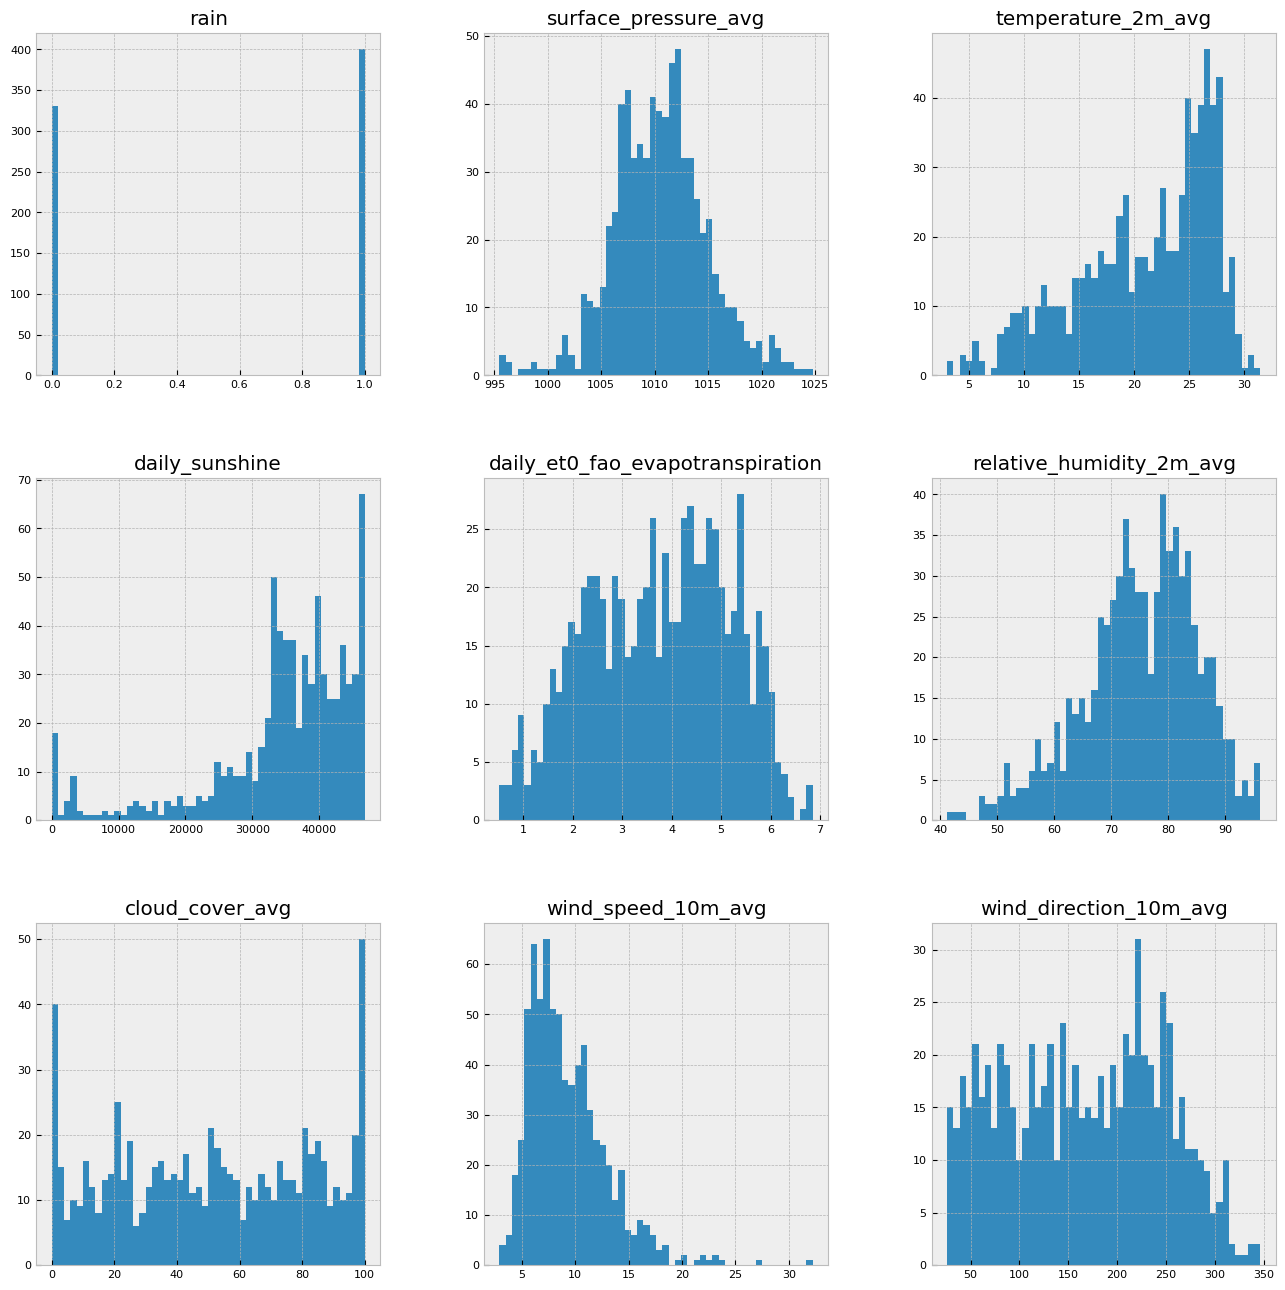

In [13]:
df.hist(figsize=(16,16), bins=50, xlabelsize=8, ylabelsize=8)

As you can see some of the distributions above are skewed, we therefore want to log smooth them. We will also standardize the features after.

array([[<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'surface_pressure_avg'}>,
        <Axes: title={'center': 'temperature_2m_avg'}>],
       [<Axes: title={'center': 'daily_sunshine'}>,
        <Axes: title={'center': 'daily_et0_fao_evapotranspiration'}>,
        <Axes: title={'center': 'relative_humidity_2m_avg'}>],
       [<Axes: title={'center': 'cloud_cover_avg'}>,
        <Axes: title={'center': 'wind_speed_10m_avg'}>,
        <Axes: title={'center': 'wind_direction_10m_avg'}>]], dtype=object)

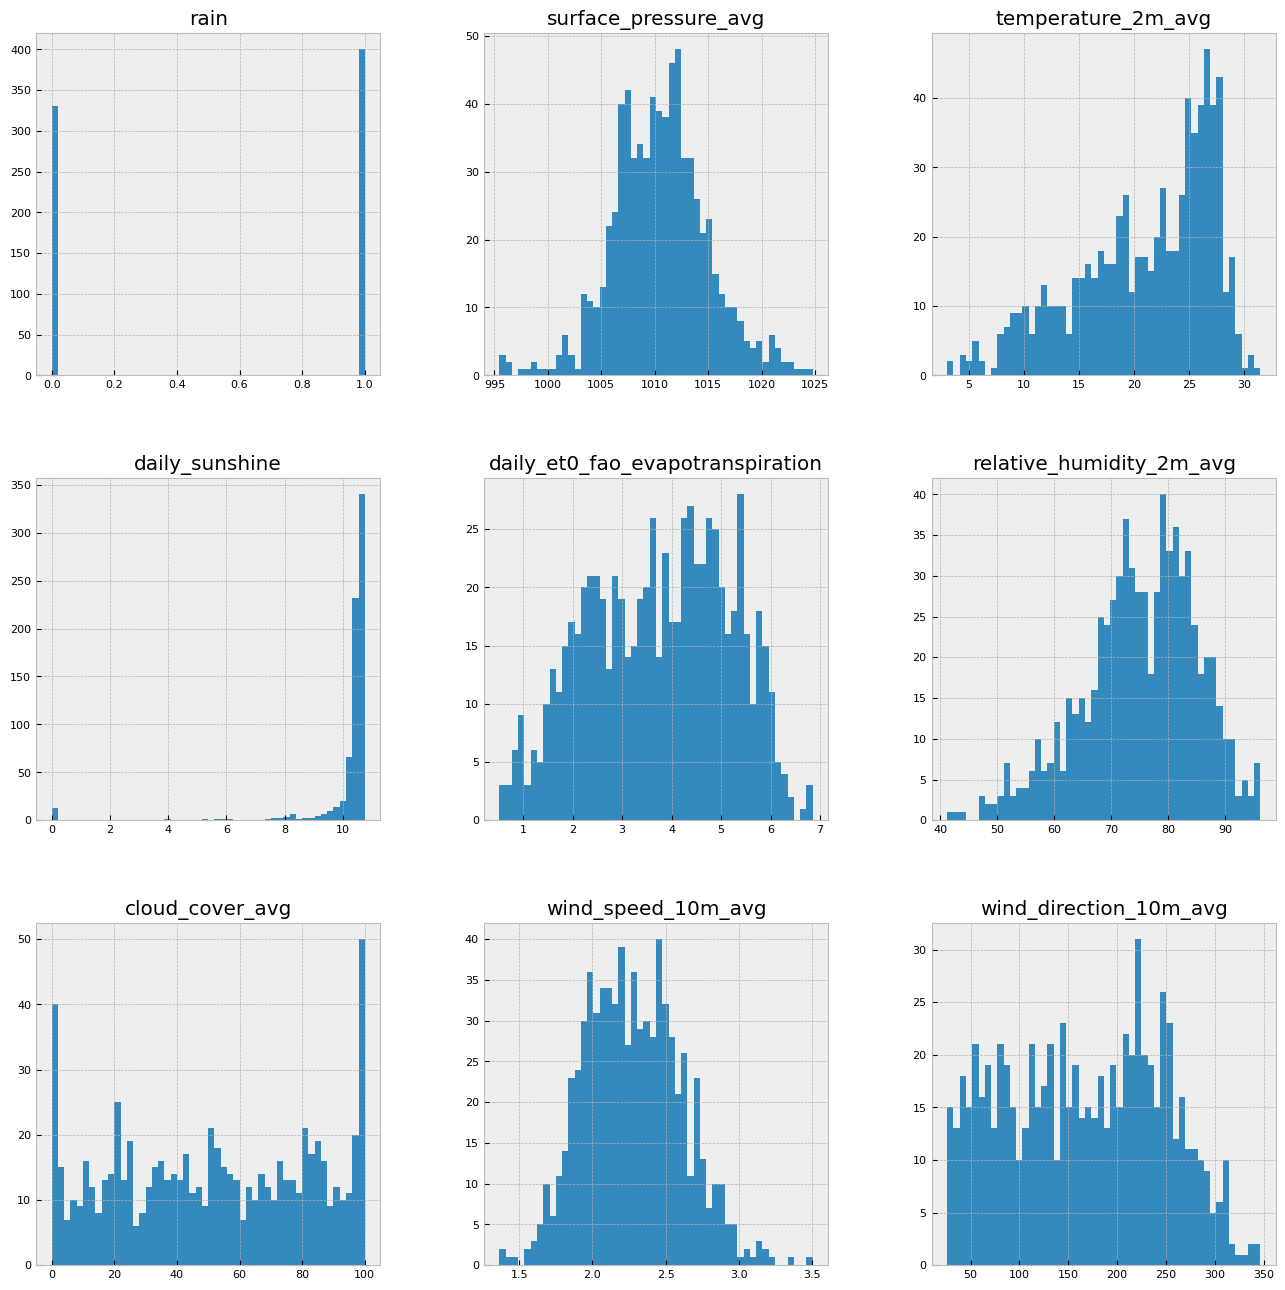

In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler

df["daily_sunshine"] = np.log1p(df["daily_sunshine"])
df["wind_speed_10m_avg"] = np.log1p(df["wind_speed_10m_avg"])

df.hist(figsize=(16,16), bins=50, xlabelsize=8, ylabelsize=8)


array([[<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'surface_pressure_avg'}>,
        <Axes: title={'center': 'temperature_2m_avg'}>],
       [<Axes: title={'center': 'daily_sunshine'}>,
        <Axes: title={'center': 'daily_et0_fao_evapotranspiration'}>,
        <Axes: title={'center': 'relative_humidity_2m_avg'}>],
       [<Axes: title={'center': 'cloud_cover_avg'}>,
        <Axes: title={'center': 'wind_speed_10m_avg'}>,
        <Axes: title={'center': 'wind_direction_10m_avg'}>]], dtype=object)

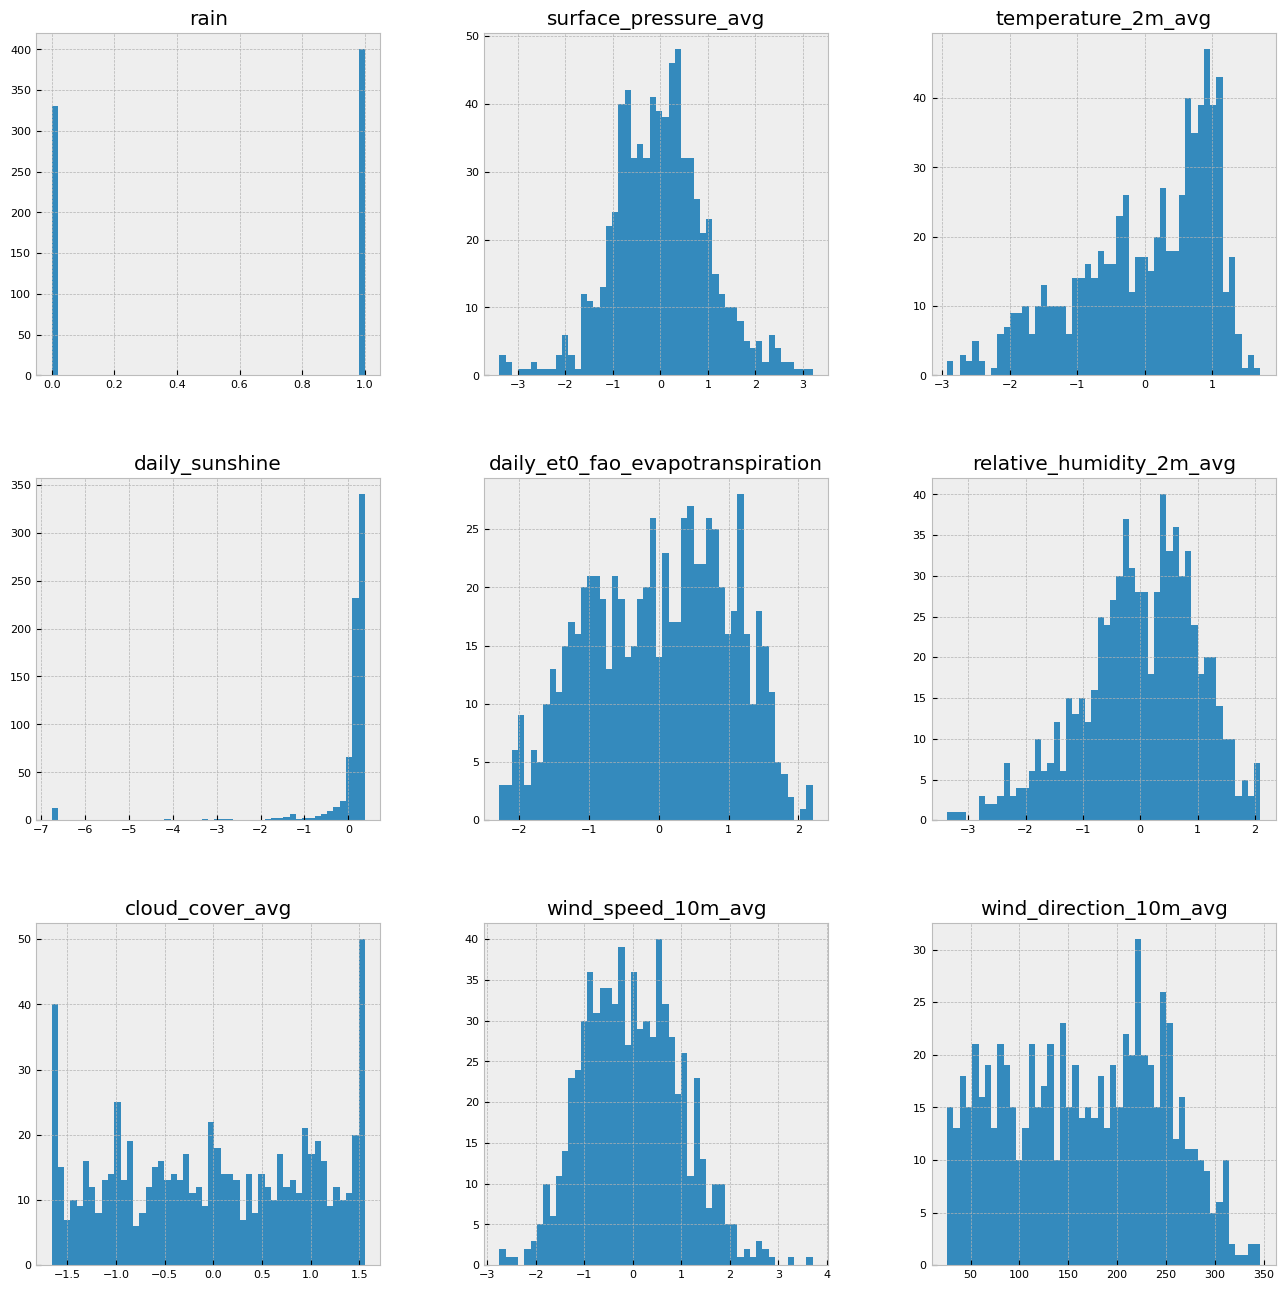

In [ ]:

features_to_standardize = [
    "temperature_2m_avg",
    "surface_pressure_avg",
    "relative_humidity_2m_avg",
    "cloud_cover_avg",
    "daily_et0_fao_evapotranspiration",
    "daily_sunshine",
    "wind_speed_10m_avg"
]

scaler =  StandardScaler()
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])
df.hist(figsize=(16,16), bins=50, xlabelsize=8, ylabelsize=8)

We have to deal with wind direction separately since it is a circular variable: the beginning and end of the scale wrap around to the same point (for example 0 and 360 degrees are the same direction). If we were to use the raw values the model would think that the directions 0 and 360 are far apart, but they are actually the same. To solve these we are going to map angles to its correspoding points on the unit circle.

0 -> (1,0)
360 -> (1,0)

As you can see this solves our problem since the directions 0 and 360 give us the same point.

In [16]:
wind_direction_angles = df["wind_direction_10m_avg"]

df["wind_dir_sin"] = np.sin(np.radians(wind_direction_angles))
df["wind_dir_cos"] = np.cos(np.radians(wind_direction_angles))
df = df.drop(columns=["wind_direction_10m_avg"])
df.head()

rain  surface_pressure_avg  temperature_2m_avg  daily_sunshine  \
0     1              0.430104            1.128285        0.367100   
1     1              0.506960            1.251426        0.367222   
2     1              0.371056            1.558939        0.366766   
3     0              0.062696            1.608604        0.366026   
4     1             -0.267222            1.387494        0.365024   

   daily_et0_fao_evapotranspiration  relative_humidity_2m_avg  \
0                          0.905102                  0.530744   
1                          1.117687                  0.099671   
2                          1.620806                 -0.961431   
3                          1.634978                 -1.160387   
4                          1.096429                 -0.082706   

   cloud_cover_avg  wind_speed_10m_avg  wind_dir_sin  wind_dir_cos  
0         0.487719           -1.144427      0.694135     -0.719845  
1        -0.990580           -2.509185     -0.292372     -0.956305  
2        -0.602896           -0.894673     -0.845728     -0.533615  
3        -1.084483           -1.684237     -0.999974     -0.007272  
4        -0.063625           -0.956088     -0.317305     -0.948324

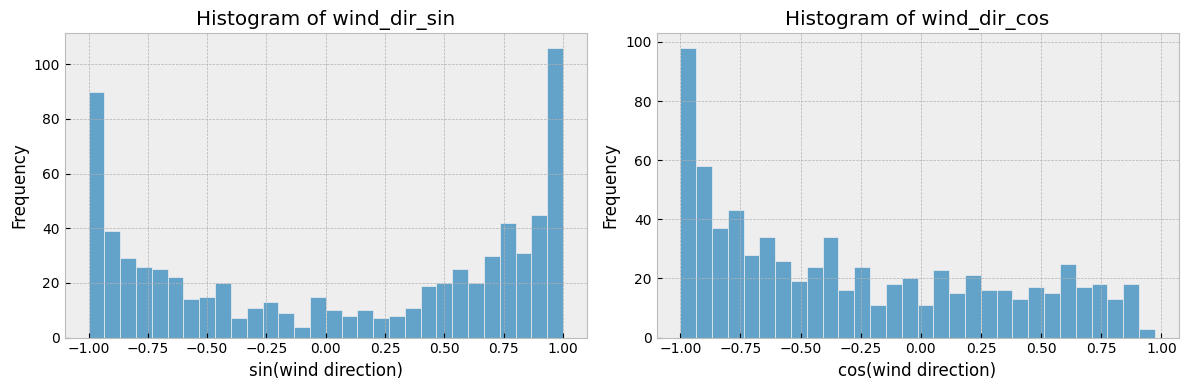

In [25]:
# Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df["wind_dir_sin"], bins=30, ax=axes[0])
axes[0].set_title("Histogram of wind_dir_sin")
axes[0].set_xlabel("sin(wind direction)")
axes[0].set_ylabel("Frequency")

sns.histplot(df["wind_dir_cos"], bins=30, ax=axes[1])
axes[1].set_title("Histogram of wind_dir_cos")
axes[1].set_xlabel("cos(wind direction)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

We are pretty much done, we just need to modularize and do train-test split!

In [17]:
from dataclasses import dataclass
from pathlib import Path

@dataclass
class DataTransformationConfig:
    """
    Configuration class for data transformation operations.
    
    Attributes:
        root_dir: Directory where transformation artifacts will be stored
        data_path: Path to the transformed data file
        test_size: Proportion of data to use for testing (default: 0.2)
        random_state: Random seed for reproducibility (default: 42)
    """
    root_dir: Path
    data_path: Path
    test_size: float 
    random_state: int 


In [18]:
from src.datascience.constants import * 
from src.datascience.utils.common import read_yaml, create_directories
from src.datascience import logger
from src.datascience.config.configuration import DataTransformationConfig

class ConfigurationManager:
    """
    Configuration manager for handling YAML configuration files.
    
    This class loads configuration, parameters, and schema files and provides
    methods to retrieve specific configuration objects.
    """
    def __init__(self, config_filepath=CONFIG_FILE_PATH, params_filepath= PARAMS_FILE_PATH, schema_filepath = SCHEMA_FILE_PATH ):

        """
        Initialize the ConfigurationManager.
        
        Args:
            config_filepath (Path): Path to the main configuration file
            params_filepath (Path): Path to the parameters file
            schema_filepath (Path): Path to the schema file
        """
          
        try:
            self.config = read_yaml(config_filepath)
            self.params = read_yaml(params_filepath)
            self.schema = read_yaml(schema_filepath)
            
            # Create artifacts root directory
            create_directories([self.config.artifacts_root])
            logger.info("ConfigurationManager initialized successfully")
            
        except Exception as e:
            logger.error(f"Error initializing ConfigurationManager: {e}")
            raise

    def get_data_transformation_config(self) -> DataTransformationConfig:
        config = self.config.data_transformation
        create_directories([config.root_dir])

        data_transformation_config = DataTransformationConfig(
            root_dir= config.root_dir,
            data_path=config.data_path,
            test_size=config.test_size,
            random_state=config.random_state
        )
        return data_transformation_config

[2025-08-07 16:05:54,602: INFO: __init__: Logger initialized for the datascience package.]


In [ ]:
import os
from src.datascience import logger
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

class DataTransformation:
    """
    Component for data transformation operations including feature extraction,
    data transformation, and train-test split.

    Raises:
        FileNotFoundError: If the data file doesn't exists

    """
 
    def __init__(self, config: DataTransformationConfig):
        self.config = config

        try:
            ## Load data
            self.df  = pd.read_csv(self.config.data_path)
            logger.info(f"Loading data from: {self.config.data_path}")
        except Exception as e:
            logger.error(f"Error when loading data during data transformation: {e}")
            raise 
            

    def feature_extraction(self):
        """
        This method perform all sort of feature extraction procedures to the data obtained
        from the API

        Raises:
            Exception: If there is an error during extraction
        """
        try:
            # Obtain target 
            logger.info(f"Adding target to the loaded data")
            precipitation_cols =[f"precipitation_{i}" for i in range(1, 25)]
            self.df["precipitation"] = self.df[precipitation_cols].sum(axis=1)  # Sum the precipitation cols along the rows
            self.df["rain"] = (self.df["precipitation"] > 0).astype(int) # If precipitation is greater than 0 it likely rained
            self.df = self.df.drop(columns=precipitation_cols)
            self.df = self.df.drop(columns=["precipitation"])

            # Remove date  column
            logger.info(f"Removing date column")
            self.df = self.df.drop(columns=["date"])

            # extracting avg from surfa_pressure and temperature_2m
            logger.info(f"Performing feature extraction")
            temp_cols = [col for col in self.df.columns if col.startswith("temperature_2m_")]
            pressure_cols = [col for col in self.df.columns if col.startswith("surface_pressure_")]
            self.df["surface_pressure_avg"] = self.df[pressure_cols].mean(axis=1)
            self.df["temperature_2m_avg"] = self.df[temp_cols].mean(axis=1)
            self.df = self.df.drop(columns=pressure_cols)
            self.df = self.df.drop(columns=temp_cols)

            # Eliminating shortwave_radiation_ due to high correlation with sunshine
            cols = [col for col in self.df.columns if col.startswith("shortwave_radiation_")]
            print(cols)
            self.df = self.df.drop(columns=cols)

            # getting daily det0_fao_evapotranspiration and sunshine
            sunshine_cols = [col for col in self.df.columns if col.startswith("sunshine_duration_")] 
            self.df["daily_sunshine"] = self.df[sunshine_cols].sum(axis=1)
            self.df = self.df.drop(columns=sunshine_cols)

            det0_fao_evapotranspiration_cols = [col for col in self.df.columns if col.startswith("et0_fao_evapotranspiration_")]
            self.df["daily_et0_fao_evapotranspiration"] = self.df[det0_fao_evapotranspiration_cols].sum(axis=1)
            self.df = self.df.drop(columns=det0_fao_evapotranspiration_cols)

            # Summarizing instant features

            features = [
            "relative_humidity_2m", "cloud_cover",
            "wind_speed_10m", "wind_direction_10m"
            ]

            for col_name in features:
                cols = [col for col in self.df.columns if col.startswith(col_name)]
                self.df[f"{col_name}_avg"] = self.df[cols].mean(axis=1)
                self.df = self.df.drop(columns=cols)

        except Exception as e:
            logger.error("An error occured while performing feature extraction: {e}")
            raise 

    def feature_transformation(self):
        """
        This method log transforms skewed features, fixes circular features and standardizes
        all but the circular feature

        Exception: If there is an error during transformation
        """
        # Log transform features
        self.df["daily_sunshine"] = np.log1p(self.df["daily_sunshine"])
        self.df["wind_speed_10m_avg"] = np.log1p(self.df["wind_speed_10m_avg"])


        # Standardizes features
        features_to_standardize = [
            "temperature_2m_avg",
            "surface_pressure_avg",
            "relative_humidity_2m_avg",
            "cloud_cover_avg",
            "daily_et0_fao_evapotranspiration",
            "daily_sunshine",
            "wind_speed_10m_avg"
        ]

        scaler =  StandardScaler()
        self.df[features_to_standardize] = scaler.fit_transform(self.df[features_to_standardize])
    
        ## Fixes circular feature
        wind_direction_angles = self.df["wind_direction_10m_avg"]
        self.df["wind_dir_sin"] = np.sin(np.radians(wind_direction_angles))
        self.df["wind_dir_cos"] = np.cos(np.radians(wind_direction_angles))
        self.df = self.df.drop(columns=["wind_direction_10m_avg"])


    def train_test_split_(self):
        """
        Split the data into training and testing sets.

        Raises:
            Exception: If there is an error during splitting
        """

        try:
            # Split the data into train and test
            logger.info(f"Splitting the data")
            train, test = train_test_split(self.df, test_size= self.config.test_size, random_state=self.config.random_state)
            logger.info("Splitted data into training and test sets")

            train.to_csv(os.path.join(self.config.root_dir, "train.csv"), index = False)
            test.to_csv(os.path.join(self.config.root_dir, "test.csv"), index = False)

            print(f"Files saved to: {self.config.root_dir}")
            logger.info(train.shape)
            logger.info(test.shape)
            
        except Exception as e:
            logger.error(f"Error during train-test split: {e}")
            raise

In [20]:
try: 
    config = ConfigurationManager()
    data_transformation_config = config.get_data_transformation_config()
    data_transformation = DataTransformation(config=data_transformation_config)
    data_transformation.train_test_split_()
except Exception as e: 
    raise e  

[2025-08-07 16:05:54,815: INFO: common: YAML file: config/config.yaml loaded successfully]
[2025-08-07 16:05:54,817: INFO: common: YAML file: params.yaml loaded successfully]
[2025-08-07 16:05:54,819: INFO: common: YAML file: schema.yaml loaded successfully]
[2025-08-07 16:05:54,820: INFO: common: Created directory at artifacts]
[2025-08-07 16:05:54,820: INFO: 2534241706: ConfigurationManager initialized successfully]
[2025-08-07 16:05:54,821: INFO: common: Created directory at artifacts/data_transformation]
[2025-08-07 16:05:54,821: INFO: 2586220882: Loading data from: artifacts/data_ingestion/data.csv]
[2025-08-07 16:05:54,830: INFO: 2586220882: Data loaded successfully. Original shape: (731, 241)]
[2025-08-07 16:05:54,831: INFO: 2586220882: Splitting the data]
[2025-08-07 16:05:54,832: INFO: 2586220882: Splitted data into training and test sets]
Files saved to: artifacts/data_transformation
[2025-08-07 16:05:54,890: INFO: 2586220882: (584, 241)]
[2025-08-07 16:05:54,891: INFO: 25862